### **Importando as bibliotecas**

In [168]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

### **Carregando os dados** 

In [169]:
etanol11 = pd.read_csv('../Data/precos-gasolina-etanol-11.csv', sep=';')
etanol12 = pd.read_csv('../Data/precos-gasolina-etanol-12.csv', sep=';')



In [170]:
t_et11 = etanol11.head(100)
t_et12 = etanol12.head(100)



In [171]:
df = pd.concat([t_et11,t_et12], ignore_index=True)
df.drop(['Cep','CNPJ da Revenda','Valor de Compra','Unidade de Medida','Complemento','Numero Rua','Nome da Rua'], inplace=True, axis='columns')
df = df.reindex(columns=['Regiao - Sigla','Estado - Sigla','Municipio','Bairro','Bandeira','Revenda','Valor de Venda','Produto','Data da Coleta'])
#df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

In [172]:
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,01/11/2023
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA ADITIVADA,01/11/2023
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,01/11/2023
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,01/11/2023
4,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.29,GASOLINA ADITIVADA,01/11/2023
...,...,...,...,...,...,...,...,...,...
195,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,5.99,GASOLINA,01/12/2023
196,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,5.99,GASOLINA ADITIVADA,01/12/2023
197,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,4.19,ETANOL,01/12/2023
198,NE,CE,FORTALEZA,BOM JARDIM,ALESAT,P 13 COMERCIO DE DERIVADOS DE PETROLEO LTDA,5.99,GASOLINA,01/12/2023


### Plotando

In [173]:
#df = df.set_index(['Data da Coleta'])
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,01/11/2023
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA ADITIVADA,01/11/2023
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,01/11/2023
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,01/11/2023
4,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.29,GASOLINA ADITIVADA,01/11/2023
...,...,...,...,...,...,...,...,...,...
195,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,5.99,GASOLINA,01/12/2023
196,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,5.99,GASOLINA ADITIVADA,01/12/2023
197,NE,CE,FORTALEZA,GRANJA PORTUGAL,RAIZEN,POSTO DE COMBUSTIVEIS XIMENES LTDA,4.19,ETANOL,01/12/2023
198,NE,CE,FORTALEZA,BOM JARDIM,ALESAT,P 13 COMERCIO DE DERIVADOS DE PETROLEO LTDA,5.99,GASOLINA,01/12/2023


In [174]:
gp1 = df.groupby(['Data da Coleta','Produto'])['Valor de Venda'].mean()
gp1

Data da Coleta  Produto           
01/11/2023      ETANOL                4.185455
                GASOLINA              5.856757
                GASOLINA ADITIVADA    5.946667
01/12/2023      ETANOL                3.972812
                GASOLINA              5.620256
                GASOLINA ADITIVADA    5.760345
Name: Valor de Venda, dtype: float64

In [175]:
gp1 = pd.DataFrame(gp1)
gp1

Valor de Venda
Data da Coleta Produto                           
01/11/2023     ETANOL                    4.185455
               GASOLINA                  5.856757
               GASOLINA ADITIVADA        5.946667
01/12/2023     ETANOL                    3.972812
               GASOLINA                  5.620256
               GASOLINA ADITIVADA        5.760345

In [176]:
# o filtro do groupby e transformado em indices por isso tem de reseta-los
gp1 = gp1.reset_index()
gp1

,Data da Coleta,Produto,Valor de Venda
0,01/11/2023,ETANOL,4.185455
1,01/11/2023,GASOLINA,5.856757
2,01/11/2023,GASOLINA ADITIVADA,5.946667
3,01/12/2023,ETANOL,3.972812
4,01/12/2023,GASOLINA,5.620256
5,01/12/2023,GASOLINA ADITIVADA,5.760345


In [181]:
gp1 = gp1.set_index(['Data da Coleta'])
gp1
# o X e o index, os produtos tem que ter colunas

KeyError: "None of ['Data da Coleta'] are in the columns"

In [178]:
gp1.T

Data da Coleta,01/11/2023,01/11/2023,01/11/2023,01/12/2023,01/12/2023,01/12/2023
Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA,ETANOL,GASOLINA,GASOLINA ADITIVADA
Valor de Venda,4.185455,5.856757,5.946667,3.972812,5.620256,5.760345


<Axes: xlabel='Data da Coleta'>

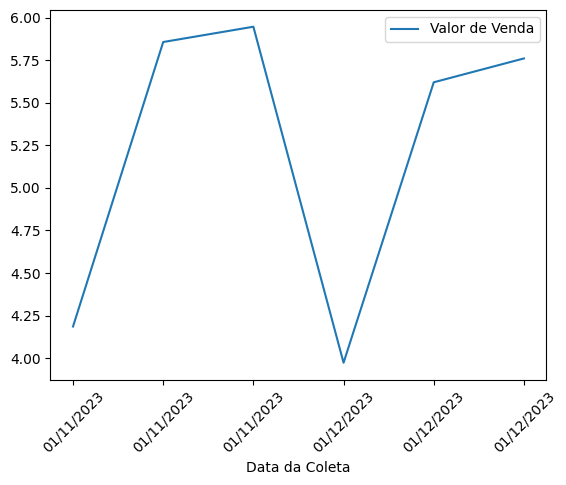

In [179]:
gp1.plot(rot=45)

In [180]:
gp1.T.plot(rot=45)

TypeError: no numeric data to plot